In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage import exposure

from skimage.morphology import *

def plot_image(img, description):
    plt.title(description)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

def plot_cdf(equalization_cdf):
    plt.plot(range(len(equalization_cdf)), equalization_cdf, 'o',markersize=1)
    plt.show()
''
def plot_histogram(histogram_data):
    plt.bar(np.arange(len(histogram_data)),histogram_data)
    plt.show()


BLACK = 0
WHITE = 255

def create_histogram(img):
    histogram = []
    for i in range(WHITE+1):
        num_of_pixels = np.count_nonzero(img[:,:] == i)
        histogram.append(num_of_pixels)

    histogram = np.array(histogram)
    return histogram



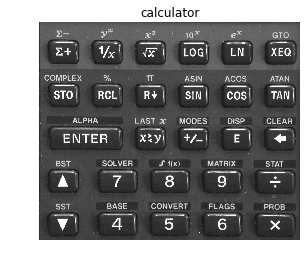

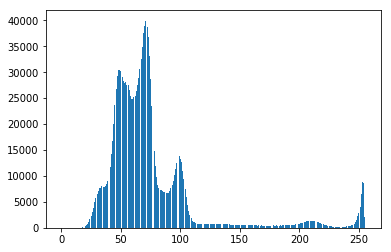

In [2]:
img = mpimg.imread('Fig0944(a)(calculator).tif')
plot_image(img, 'calculator')

histogram = create_histogram(img)
plot_histogram(histogram)

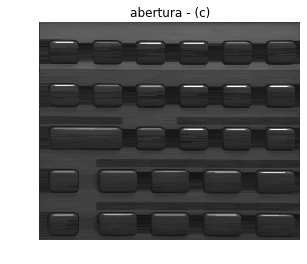

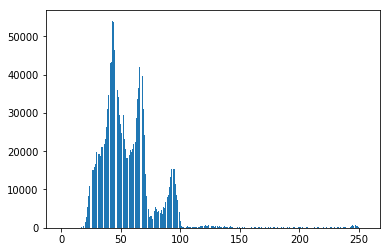

In [3]:
#selem = rectangle(1,71)
selem = np.ones([1,71], dtype=np.uint8)
#display(selem)

img_c = opening(img, selem)
plot_image(img_c, 'abertura - (c)')

histogram = create_histogram(img_c)
plot_histogram(histogram)

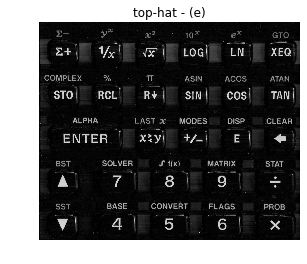

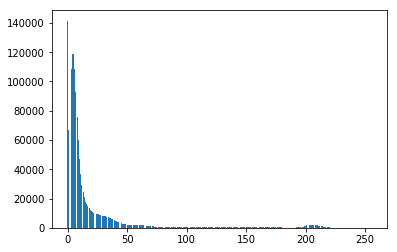

In [4]:
img_e = img - img_c
plot_image(img_e, 'top-hat - (e)')

histogram = create_histogram(img_e)
plot_histogram(histogram)

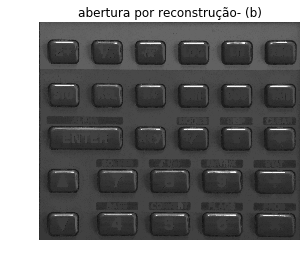

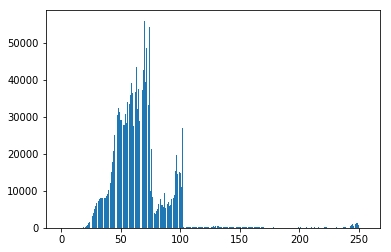

In [5]:
img_b = erosion(img,selem)
img_b = reconstruction(img_b, img, method='dilation')
plot_image(img_b, 'abertura por reconstrução- (b)')

histogram = create_histogram(img_b)
plot_histogram(histogram)

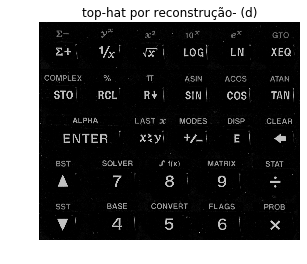

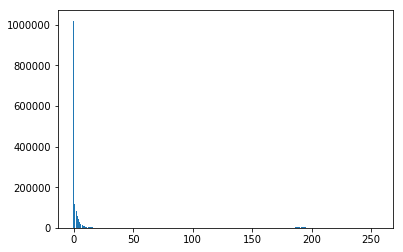

In [6]:
img_d = img - img_b
plot_image(img_d, 'top-hat por reconstrução- (d)')

histogram = create_histogram(img_d)
plot_histogram(histogram)

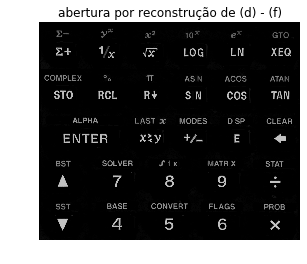

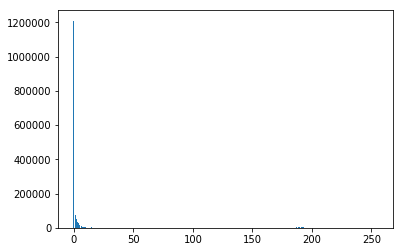

In [7]:
selem11 = np.ones([1,11], dtype=np.uint8)

img_f = erosion(img_d,selem11)
img_f = reconstruction(img_f,img_d, method='dilation')
plot_image(img_f, 'abertura por reconstrução de (d) - (f)')

histogram = create_histogram(img_f)
plot_histogram(histogram)

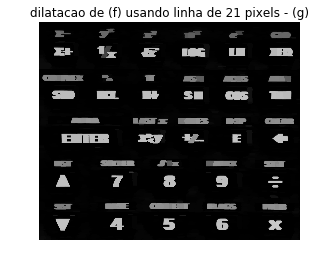

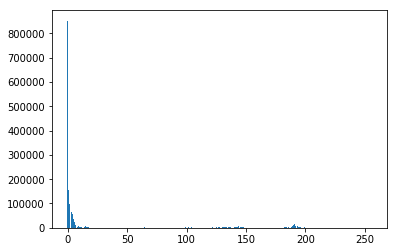

In [8]:
selem21 = np.ones([1,21], dtype=np.uint8)

img_g = dilation(img_f,selem21)
plot_image(img_g, 'dilatacao de (f) usando linha de 21 pixels - (g)')

histogram = create_histogram(img_g)
plot_histogram(histogram)

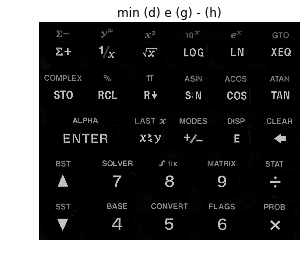

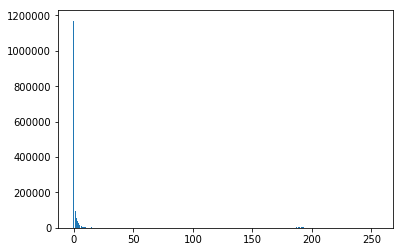

In [9]:
img_h = np.minimum(img_d,img_g)

plot_image(img_h, 'min (d) e (g) - (h)')

histogram = create_histogram(img_h)
plot_histogram(histogram)

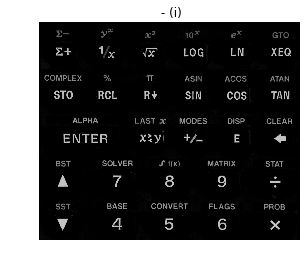

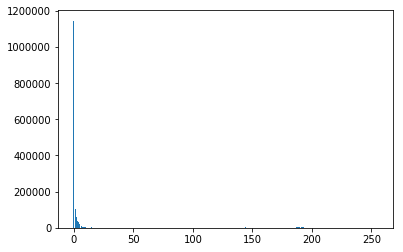

In [10]:
#plot_image(im6, '6 - (i)')
img_i = reconstruction(img_h, img_d, method='dilation')


plot_image(img_i, ' - (i)')

histogram = create_histogram(img_i)
plot_histogram(histogram)